# Lecture 9 - Motor Control
### Introduction to modeling and simulation of human movement
https://github.com/BMClab/bmc/blob/master/courses/ModSim2018.md

* In class:

In [1]:
import numpy as np
#import pandas as pd
#import pylab as pl
import matplotlib.pyplot as plt
import math

%matplotlib notebook

### Muscle properties

In [2]:
Lslack = .223
Lce_o = .093 #optmal l

Fmax = 3000


### Initial conditions

In [3]:
LceNorm = .087/Lce_o
t0 = 0
tf = 2.99
h = 1e-3

In [4]:
t = np.arange(t0,tf,h)
F = np.empty(t.shape)
Fkpe = np.empty(t.shape)
fiberLength = np.empty(t.shape)
tendonLength = np.empty(t.shape)

In [5]:
def computeTendonForce(LseeNorm, Lslack, Lce_o): 
    '''
    Compute Tendon Force
    
    Imputs: 
    
    LseeNorm - Normalized Tendon length
    
    Lslack - slack length of the tendon (not-normalized)
    
    Lce_o - Optimal length of the fiber 
    
    Output:
    
    FTendonNorm - Normalized tendon force 
    '''
    
    Umax = .04
    if LseeNorm<Lslack/Lce_o: 
        FTendonNorm = 0
    else: 
        FTendonNorm = ((LseeNorm-Lslack/Lce_o)/(Umax*Lslack/Lce_o))**2
        
    return FTendonNorm

In [6]:
def computeParallelElementForce(LceNorm): 
    Umax = 1 
    
    if LceNorm<1: 
        FkpeNorm = 0
    else: 
        FkpeNorm = ((LceNorm-1)/Umax)**2
        
    return FkpeNorm 

In [7]:
def computeForceLengthCurve(LceNorm):

    width = .63
    F0 = max([0, (1-((LceNorm-1)/width)**2)])

    return F0

In [8]:
def computeContractilElementDerivative (F0, FCE): 
    
    a = .25
    b = .25*10
    if  FCE>F0: 
        print('Error: cannot do eccentric contractions')
    
    LceNormdot = -b*(F0-FCE)/(FCE+a) 
    
    return LceNormdot    

In [9]:
def computeContractilElementForce (FTendonNorm, FkpeNorm):
    FCE = FTendonNorm - FkpeNorm
    return FCE

In [10]:
def computeTendonLenght (Lm, Lce_o, LceNorm):
    LseeNorm = Lm/Lce_o - LceNorm
    
    return LseeNorm

## Simulation - Parallel

In [11]:
for i in range (len(t)):
    #ramp
    if t[i]<=1:
        Lm = 0.31
    elif t[i]>1 and t[i]<2:
        Lm = .31 - .04*(t[i]-1)
        #print(Lm)
    ##################################################
    LseeNorm = computeTendonLenght (Lm, Lce_o, LceNorm)
    
    FTendonNorm = computeTendonForce(LseeNorm, Lslack, Lce_o)    
    
    FkpeNorm = computeParallelElementForce(LceNorm)      
    
    F0 = computeForceLengthCurve (LceNorm)
    
    FCE = computeContractilElementForce (FTendonNorm, FkpeNorm)
    
    LceNormdot =computeContractilElementDerivative (F0, FCE)      
 
    # --- Euler integration step
    LceNorm = LceNorm + h*LceNormdot
    
    F[i] = FTendonNorm * Fmax
    fiberLength[i] = LceNorm * Lce_o
    tendonLength[i] = LseeNorm * Lce_o
    

## Plot 

<IPython.core.display.Javascript object>


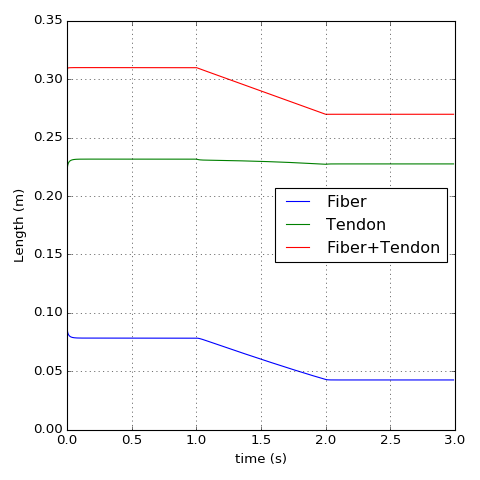

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(6,6), sharex=True)

ax.plot(t,fiberLength, label = 'Fiber')
ax.plot(t,tendonLength, label = 'Tendon')
ax.plot(t,fiberLength+tendonLength, label = 'Fiber+Tendon')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('time (s)')
plt.ylabel('Length (m)')
plt. tight_layout()
